In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import pandas as pd
import numpy as np
import statsmodels.api as sm
import skimage
import skimage.feature

import seaborn as sns
sns.set_context('paper')
sns.set_style('white')

import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

In [140]:
import platform
if platform.system() == 'Windows':
    basepath = r'C:\Users\jenniferwh\Dropbox (Allen Institute)\Mesoscale Connectome Papers in Progress/2019 DMN'
elif platform.system() == 'Darwin':
    basepath = r'/Users/jenniferwh/Dropbox (Allen Institute)/Mesoscale Connectome Papers in Progress/2019 DMN'
path = os.path.join(basepath, '_new_figures', 'Figure_6')
maskpath = os.path.join(basepath, 'fMRI_masks')

In [4]:
import nrrd
both_dmn_masks, _ = nrrd.read(os.path.join(maskpath, 'dmn_mask_and_core.nrrd'))
dmn_mask = np.zeros(both_dmn_masks.shape)
dmn_mask[np.where(both_dmn_masks > 0)] = 1
core_mask = np.zeros(both_dmn_masks.shape)
core_mask[np.where(both_dmn_masks == 2)] = 1

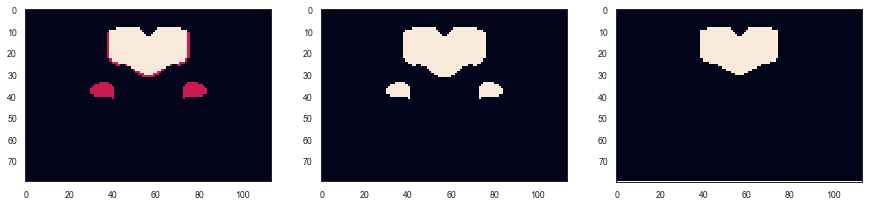

In [5]:
fig, ax = plt.subplots(1, 3, figsize = (15, 5))
ax[0].imshow(both_dmn_masks[50])
ax[1].imshow(dmn_mask[50])
ax[2].imshow(core_mask[50])

In [192]:
import scipy.ndimage
def get_mask(axis):
    mask, _ = nrrd.read(os.path.join(maskpath, 
                                     'all ICA components and masks zscore 1',
                                     'ica_all_05_icasso_iter_1000_comp_1_mask_z_1_allen_masked_sym_thresh_2.nrrd'))
    mask1 = make_mask(mask, axis)
    return mask1

def get_core_mask(axis):
    mask1 = make_mask(mask, axis)
    return mask1

def make_mask(mask, axis):
    mask = scipy.ndimage.filters.gaussian_filter(mask, 1, order = 0)
    mask = scipy.ndimage.zoom(mask, 4, order=2)
    if axis == 'horizontal':
        mask = mask.max(axis = 1)
    elif axis == 'sagittal':
        mask = mask[:,:,228:]
        mask = mask.max(axis = 2)
    elif axis == 'section':
        mask[np.where(mask < -0.1)] = np.nan
        
    return mask

In [7]:
from allensdk.core.mouse_connectivity_cache import MouseConnectivityCache
mcc = MouseConnectivityCache(manifest_file='../connectivity/mouse_connectivity_manifest.json',
                            resolution=25) #Use 25 for images, 100 for calculations
template, _ = mcc.get_template_volume()

In [142]:
import colormap
c = colormap.Colormap()
all_green_cmap = c.cmap_linear('green', 'green', 'green')
green_cmap = c.cmap_linear('black', 'green', 'lightgreen')
cyan_cmap = c.cmap_linear('black', 'darkcyan', 'cyan')
magenta_cmap = c.cmap_linear('black', 'darkmagenta', 'magenta')
white_cmap = c.cmap_linear('black','white', 'white')
gray_cmap = c.cmap_linear('black', 'black', 'LightGray')
dark_cmap = c.cmap_linear('black', 'black', 'dimgray')

In [193]:
sag_mask = make_mask(dmn_mask, 'sagittal')

In [10]:
template.shape

(528, 320, 456)

In [11]:
sag_mask.shape

(528, 320)

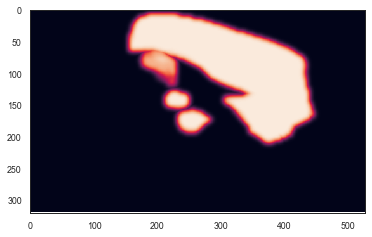

In [194]:
plt.imshow(np.rot90(sag_mask, k=1, axes=(1,0)))

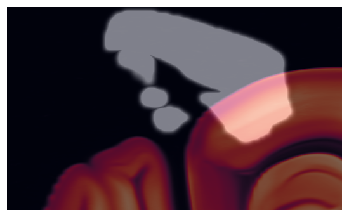

In [195]:
fig, ax = plt.subplots()
plt.imshow(np.rot90(template[:,:,228], k=1, axes=(1,0)))
plt.imshow(np.rot90(sag_mask, k=1, axes=(1,0)), cmap = white_cmap, alpha = 0.5)
fig6path = r'/Users/jenniferwh/Dropbox (Allen Institute)/Mesoscale Connectome Papers in Progress/2019 DMN/_new_figures/Figure_6'
filename = os.path.join(fig6path, 'DMN_mask_sag.pdf')
ax.set_axis_off()
#plt.savefig(filename, dpi=300, bbox_inches='tight')

In [18]:
section_mask = get_mask('section')

In [19]:
section_mask.shape

(528, 320, 456)

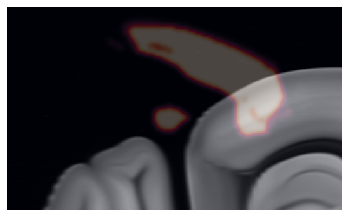

In [196]:
section = 228

fig, ax = plt.subplots()
plt.imshow(np.rot90(template[:,:,section], k=1, axes=(1,0)), cmap = 'gray')
plt.imshow(np.rot90(section_mask[:,:,section], k=1, axes=(1,0)), alpha = 0.3)
fig6path = r'/Users/jenniferwh/Dropbox (Allen Institute)/Mesoscale Connectome Papers in Progress/2019 DMN/_new_figures/Figure_6'
filename = os.path.join(fig6path, 'DMN_mask_sag.pdf')
ax.set_axis_off()

In [141]:
isid = 592522663 #PLd target 
proj_den_pl, _ = mcc.get_projection_density(isid)
data_mask_pl, _ = mcc.get_data_mask(isid)
isid = 521255975 #ACAd target 
proj_den_acad, _ = mcc.get_projection_density(isid)
data_mask_acad, _ = mcc.get_data_mask(isid)
isid = 569904687 #VISl_target 
proj_den_visl, _ = mcc.get_projection_density(isid)
data_mask_visl, _ = mcc.get_data_mask(isid)

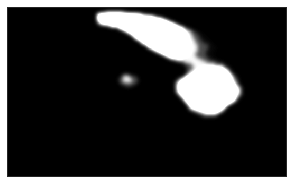

In [189]:
maxi = 159
fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.imshow(np.rot90(section_mask[:,:,maxi], k=1, axes=(1,0)), cmap = white_cmap)
#ax.imshow(np.rot90(proj_den_visl[:,:,maxi], k=1, axes=(1,0)), cmap = green_cmap)
#ax.imshow(np.rot90(proj_den_acad[:,:,maxi], k=1, axes=(1,0)), cmap = cyan_cmap)
#ax.imshow(np.rot90(proj_den_pl[:,:,maxi], k=1, axes=(1,0)), cmap = magenta_cmap)
#ax.imshow(np.rot90(template[:,:,maxi], k=1, axes=(1,0)), cmap = 'gray', interpolation = 'none')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
filename = os.path.join(path, 'DMN_mask_{0}'.format(maxi)+'.png')
plt.savefig(filename, dpi=300, bbox_inches='tight')

In [101]:
## CAREFUL this saves a lot of files
#maxi = 
section_path = r'/Users/jenniferwh/Dropbox/DMN data/Figure_6_RSPv_images/sag_sections'
for maxi in range(456):
    fig, ax = plt.subplots(1,1, figsize=(5,5))
    ax.imshow(np.rot90(section_mask[:,:,maxi], k=1, axes=(1,0)))
    ax.imshow(np.rot90(density[:,:,maxi], k=1, axes=(1,0)), cmap = green_cmap, alpha = 0.5)
    ax.imshow(np.rot90(template[:,:,maxi], k=1, axes=(1,0)), cmap = 'gray', 
          interpolation = 'none', alpha = 0.6)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    filename = os.path.join(section_path, 'RSPv_ACAd_'+'DMN_mask_'+'sag_{0}'.format(maxi)+'.png')
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.close()

In [ ]:
reference_space =  mcc.get_reference_space()

In [130]:
template.shape

(528, 320, 456)

In [131]:
456*25

11400

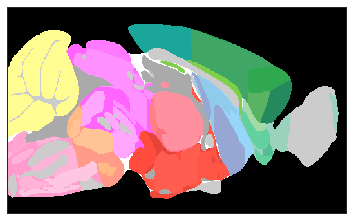

In [157]:
maxi = 226
slice_image = reference_space.get_slice_image(2,maxi*25) # this method wants an axis and a position in microns
fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.imshow(np.rot90(slice_image, k=1, axes=(1,0)))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.tight_layout()
filename = os.path.join(path, 'atlas_'+'sag_{0}'.format(maxi)+'.png')
plt.savefig(filename, dpi=300, bbox_inches='tight')

In [190]:
## Go to 10 um grid for projections

In [191]:
mcc = MouseConnectivityCache(manifest_file='../connectivity/mouse_connectivity_manifest.json',
                            resolution=10) #Use 25 for images, 100 for calculations
template, _ = mcc.get_template_volume()

In [199]:
section_mask = scipy.ndimage.filters.gaussian_filter(dmn_mask, 1, order = 0)

In [200]:
section_mask = scipy.ndimage.zoom(section_mask, 10, order=2)
section_mask[np.where(section_mask < -0.1)] = np.nan

In [201]:
isid = 592522663 #PLd target 
proj_den_pl, _ = mcc.get_projection_density(isid)
data_mask_pl, _ = mcc.get_data_mask(isid)
isid = 521255975 #ACAd target 
proj_den_acad, _ = mcc.get_projection_density(isid)
data_mask_acad, _ = mcc.get_data_mask(isid)
isid = 569904687 #VISl_target 
proj_den_visl, _ = mcc.get_projection_density(isid)
data_mask_visl, _ = mcc.get_data_mask(isid)

2020-04-20 19:16:54,486 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download_file/592522663?image=projection_density&resolution=10
2020-04-20 19:17:21,355 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download_file/592522663?image=data_mask&resolution=10
2020-04-20 19:17:47,063 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download_file/521255975?image=projection_density&resolution=10
2020-04-20 19:18:14,900 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download_file/521255975?image=data_mask&resolution=10
2020-04-20 19:18:39,507 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/grid_data/download_file/569904687?image=projection_density&resolution=10
2020-04-20 19:19:09,360 allensdk.api.api.retrieve_file_over_http INFO    

In [207]:
template.shape

(1320, 800, 1140)

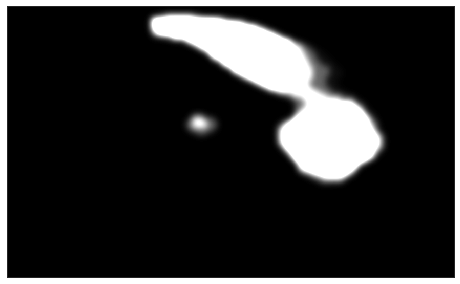

In [287]:
maxi = 400
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.imshow(np.rot90(section_mask[:,:,maxi], k=1, axes=(1,0)), cmap = white_cmap)
#ax.imshow(np.rot90(proj_den_visl[:,:,maxi], k=1, axes=(1,0)), cmap = green_cmap)
#ax.imshow(np.rot90(proj_den_acad[:,:,maxi], k=1, axes=(1,0)), cmap = cyan_cmap)
#ax.imshow(np.rot90(proj_den_pl[:,:,maxi], k=1, axes=(1,0)), cmap = magenta_cmap)
#ax.imshow(np.rot90(template[:,:,maxi], k=1, axes=(1,0)), cmap = 'gray', interpolation = 'none')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
filename = os.path.join(path, 'DMN_mask_{0}'.format(maxi)+'.png')
plt.savefig(filename, dpi=300, bbox_inches='tight')

In [215]:
reference_space =  mcc.get_reference_space()

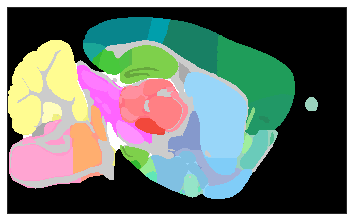

In [277]:
maxi = 360
slice_image = reference_space.get_slice_image(2,maxi*10) # this method wants an axis and a position in microns
fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.imshow(np.rot90(slice_image, k=1, axes=(1,0)))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.tight_layout()
filename = os.path.join(path, 'atlas_'+'sag_{0}'.format(maxi)+'.png')
plt.savefig(filename, dpi=300, bbox_inches='tight')